In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
# read book csv into dataframe
books = pd.read_csv('BX-Books.csv')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
3,0440234743,The Testament,John Grisham,1999,Dell
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart


In [3]:
# check missing data
missing_books = books.isna().sum()
print(missing_books)
print(" ")

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Book-Publisher         0
dtype: int64
 


In [4]:
# check the number of authors and the amount of books they wrote
books['Book-Author'].value_counts()

Book-Author
Stephen King      193
Nora Roberts      123
Anne McCaffrey     81
Danielle Steel     74
Piers Anthony      70
                 ... 
Tony Kushner        1
Greg Louganis       1
James Michener      1
Amitav Ghosh        1
Roberto Bolano      1
Name: count, Length: 6452, dtype: int64

In [5]:
# check the amout of books each year published
books['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    1750
2001    1572
2003    1530
2000    1384
1999    1346
        ... 
1932       1
1929       1
1945       1
1927       1
1949       1
Name: count, Length: 70, dtype: int64

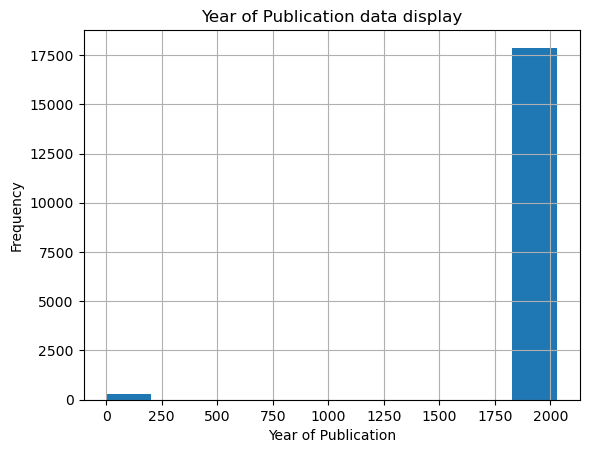

In [6]:
# display each year the anount of books that have published
books['Year-Of-Publication'].hist(bins=10)

plt.title('Year of Publication data display')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

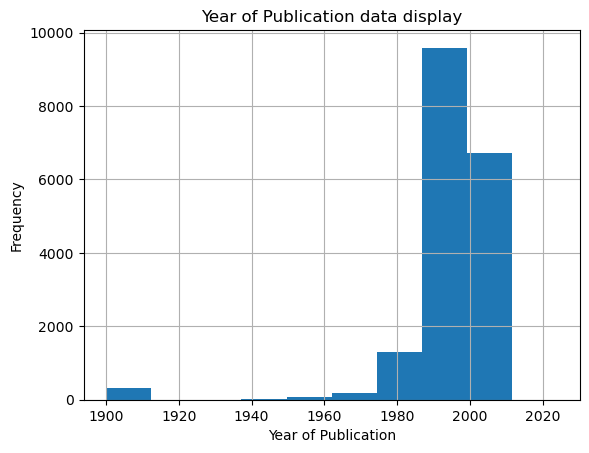

In [7]:
# determine the time interval that will be analysis
# as the books published before 1900 do not have a large proportion which has less contribution in ratings
books['Year-Of-Publication'] = books['Year-Of-Publication'].clip(upper=2024, lower=1900)

books['Year-Of-Publication'].hist(bins=10)

plt.title('Year of Publication data display')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

In [8]:
# classify publication years into bins
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]

books['Year-Of-Publication-Bin'] = pd.cut(books['Year-Of-Publication'], bins=bins, right=False)
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"[2000, 2020)"
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"[1980, 2000)"
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,"[1980, 2000)"
3,0440234743,The Testament,John Grisham,1999,Dell,"[1980, 2000)"
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,"[1980, 2000)"
...,...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf,"[2000, 2020)"
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing,"[1980, 2000)"
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama,"[2000, 2020)"
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart,"[1980, 2000)"


In [9]:
# encode authors and publishers
label_encoder = LabelEncoder()

books['Book-Author-Encode'] = label_encoder.fit_transform(books['Book-Author'])
books['Book-Publisher-Encode'] = label_encoder.fit_transform(books['Book-Publisher'])
books['Year-Of-Publication-Bin-Encode'] = label_encoder.fit_transform(books['Year-Of-Publication-Bin'])

books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,Year-Of-Publication-Bin-Encode
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"[2000, 2020)",5190,522,5
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"[1980, 2000)",2169,406,4
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,"[1980, 2000)",240,952,4
3,0440234743,The Testament,John Grisham,1999,Dell,"[1980, 2000)",3079,287,4
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,"[1980, 2000)",6132,910,4
...,...,...,...,...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf,"[2000, 2020)",3299,39,5
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing,"[1980, 2000)",4234,63,4
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama,"[2000, 2020)",5348,56,5
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart,"[1980, 2000)",4489,731,4
